<a href="https://colab.research.google.com/github/tanyash05/DataScienceProject/blob/main/DSA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroquery

  Using cached astroquery-0.4.10-py3-none-any.whl.metadata (6.3 kB)
  Using cached pyvo-1.6.2-py3-none-any.whl.metadata (4.7 kB)
Using cached astroquery-0.4.10-py3-none-any.whl (11.1 MB)
Using cached pyvo-1.6.2-py3-none-any.whl (999 kB)


In [2]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

In [3]:
exo_table = NasaExoplanetArchive.query_criteria(table="pscomppars")
exo_table.write('exo.csv', format='csv', overwrite=True)

UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.")
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.")
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.")
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.t

In [4]:
from google.colab import files
files.download('exo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
df = pd.read_csv('exo.csv')
df.head()

,objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,...,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_angsep_reflink,pl_ndispec,sky_coord
0,3.12508,OGLE-2016-BLG-1227L b,b,2.104385,OGLE-2016-BLG-1227L,NaN,NaN,NaN,2020-03,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"265.597125,-33.7597778"
1,3.11023,HAT-P-3 b,b,2.103408,HAT-P-3,NaN,NaN,TIC 311035838,2007-09,2007,...,0.2870,NaN,NaN,0.0,NaN,0.2870,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,"206.0940142,48.028565"
2,3.24410,Kepler-1065 b,b,2.430631,Kepler-1065,NaN,NaN,TIC 378012771,2016-05,2016,...,0.0405,NaN,NaN,0.0,NaN,0.0405,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,"294.511319,38.7904648"
3,3.11091,HD 132406 b,b,2.573350,HD 132406,HD 132406,HIP 73146,TIC 309808219,2007-10,2007,...,28.0000,NaN,NaN,0.0,NaN,28.0000,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,"224.2276121,53.3809615"
4,3.12740,TOI-1260 c,c,2.572931,TOI-1260,NaN,NaN,TIC 355867695,2021-08,2021,...,0.8930,NaN,NaN,0.0,NaN,0.8930,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0,"157.1440712,65.8541986"


In [6]:
df.shape

(5889, 683)

In [7]:
df['pl_discmethod'] = df['discoverymethod']
df['pl_discmethod'].value_counts()

,count
pl_discmethod,
Transit,4373
Radial Velocity,1118
Microlensing,237
Imaging,83
Transit Timing Variations,36
Eclipse Timing Variations,17
Orbital Brightness Modulation,9
Pulsar Timing,8
Astrometry,5


In [8]:
df_clean = df.dropna(subset=[
    'pl_discmethod','pl_bmasse','pl_rade',
    'pl_orbper','pl_eqt','st_teff','st_mass','st_rad'
])

features = ['pl_bmasse','pl_rade','pl_orbper','pl_eqt',
            'st_teff','st_mass','st_rad','st_lum']

X = df_clean[features]
y = df_clean['pl_discmethod']

In [9]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4310 entries, 1 to 5888
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_bmasse  4310 non-null   float64
 1   pl_rade    4310 non-null   float64
 2   pl_orbper  4310 non-null   float64
 3   pl_eqt     4310 non-null   float64
 4   st_teff    4310 non-null   float64
 5   st_mass    4310 non-null   float64
 6   st_rad     4310 non-null   float64
 7   st_lum     4310 non-null   float64
dtypes: float64(8)
memory usage: 303.0 KB
None


In [10]:
print(X.describe())

         pl_bmasse      pl_rade     pl_orbper       pl_eqt       st_teff  \
count  4310.000000  4310.000000  4.310000e+03  4310.000000   4310.000000   
mean    135.662070     4.375013  9.696608e+04   905.821348   5387.634633   
std     525.557825     4.602272  6.125504e+06   453.469338    826.625872   
min       0.037400     0.309800  1.768913e-01    55.900000   2320.000000   
25%       3.460000     1.630000  3.951227e+00   568.000000   5029.250000   
50%       7.040000     2.440000  8.595128e+00   814.000000   5596.000000   
75%      20.932506     3.940000  2.051618e+01  1147.750000   5926.000000   
max    8899.195396    30.488480  4.020000e+08  4050.000000  10170.000000   

           st_mass       st_rad       st_lum  
count  4310.000000  4310.000000  4310.000000  
mean      0.934589     1.010531    -0.191922  
std       0.272148     0.441452     0.659874  
min       0.014700     0.013100    -4.120000  
25%       0.800000     0.770000    -0.471300  
50%       0.940600     0.939500  

In [11]:
print(X.head())

    pl_bmasse   pl_rade  pl_orbper  pl_eqt  st_teff  st_mass  st_rad   st_lum
1    206.5895  10.53646   2.899700  1189.0   5185.0    1.060   0.870 -0.36000
2     13.4000   3.73000   3.609309  1092.0   5635.0    0.940   0.930 -0.11584
4     13.2000   2.76000   7.493134   651.0   4227.0    0.679   0.672 -0.88941
11     7.9430   4.23000  56.008190   585.2   6120.0    1.260   1.446  0.45579
12     2.9900   1.54000   4.163873  1158.0   5789.0    0.980   1.040 -0.01175


In [12]:
print(y.value_counts())

pl_discmethod
Transit                          4117
Radial Velocity                   159
Transit Timing Variations          19
Imaging                            14
Orbital Brightness Modulation       1
Name: count, dtype: int64


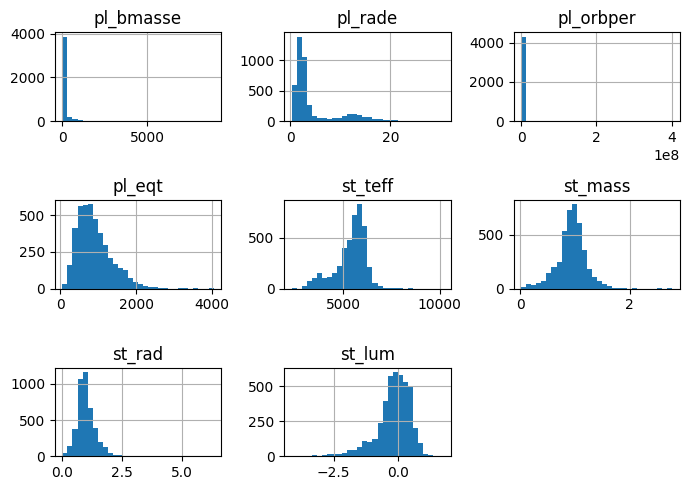

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

X.hist(bins=30,figsize=(7,5))
plt.tight_layout()
plt.show()

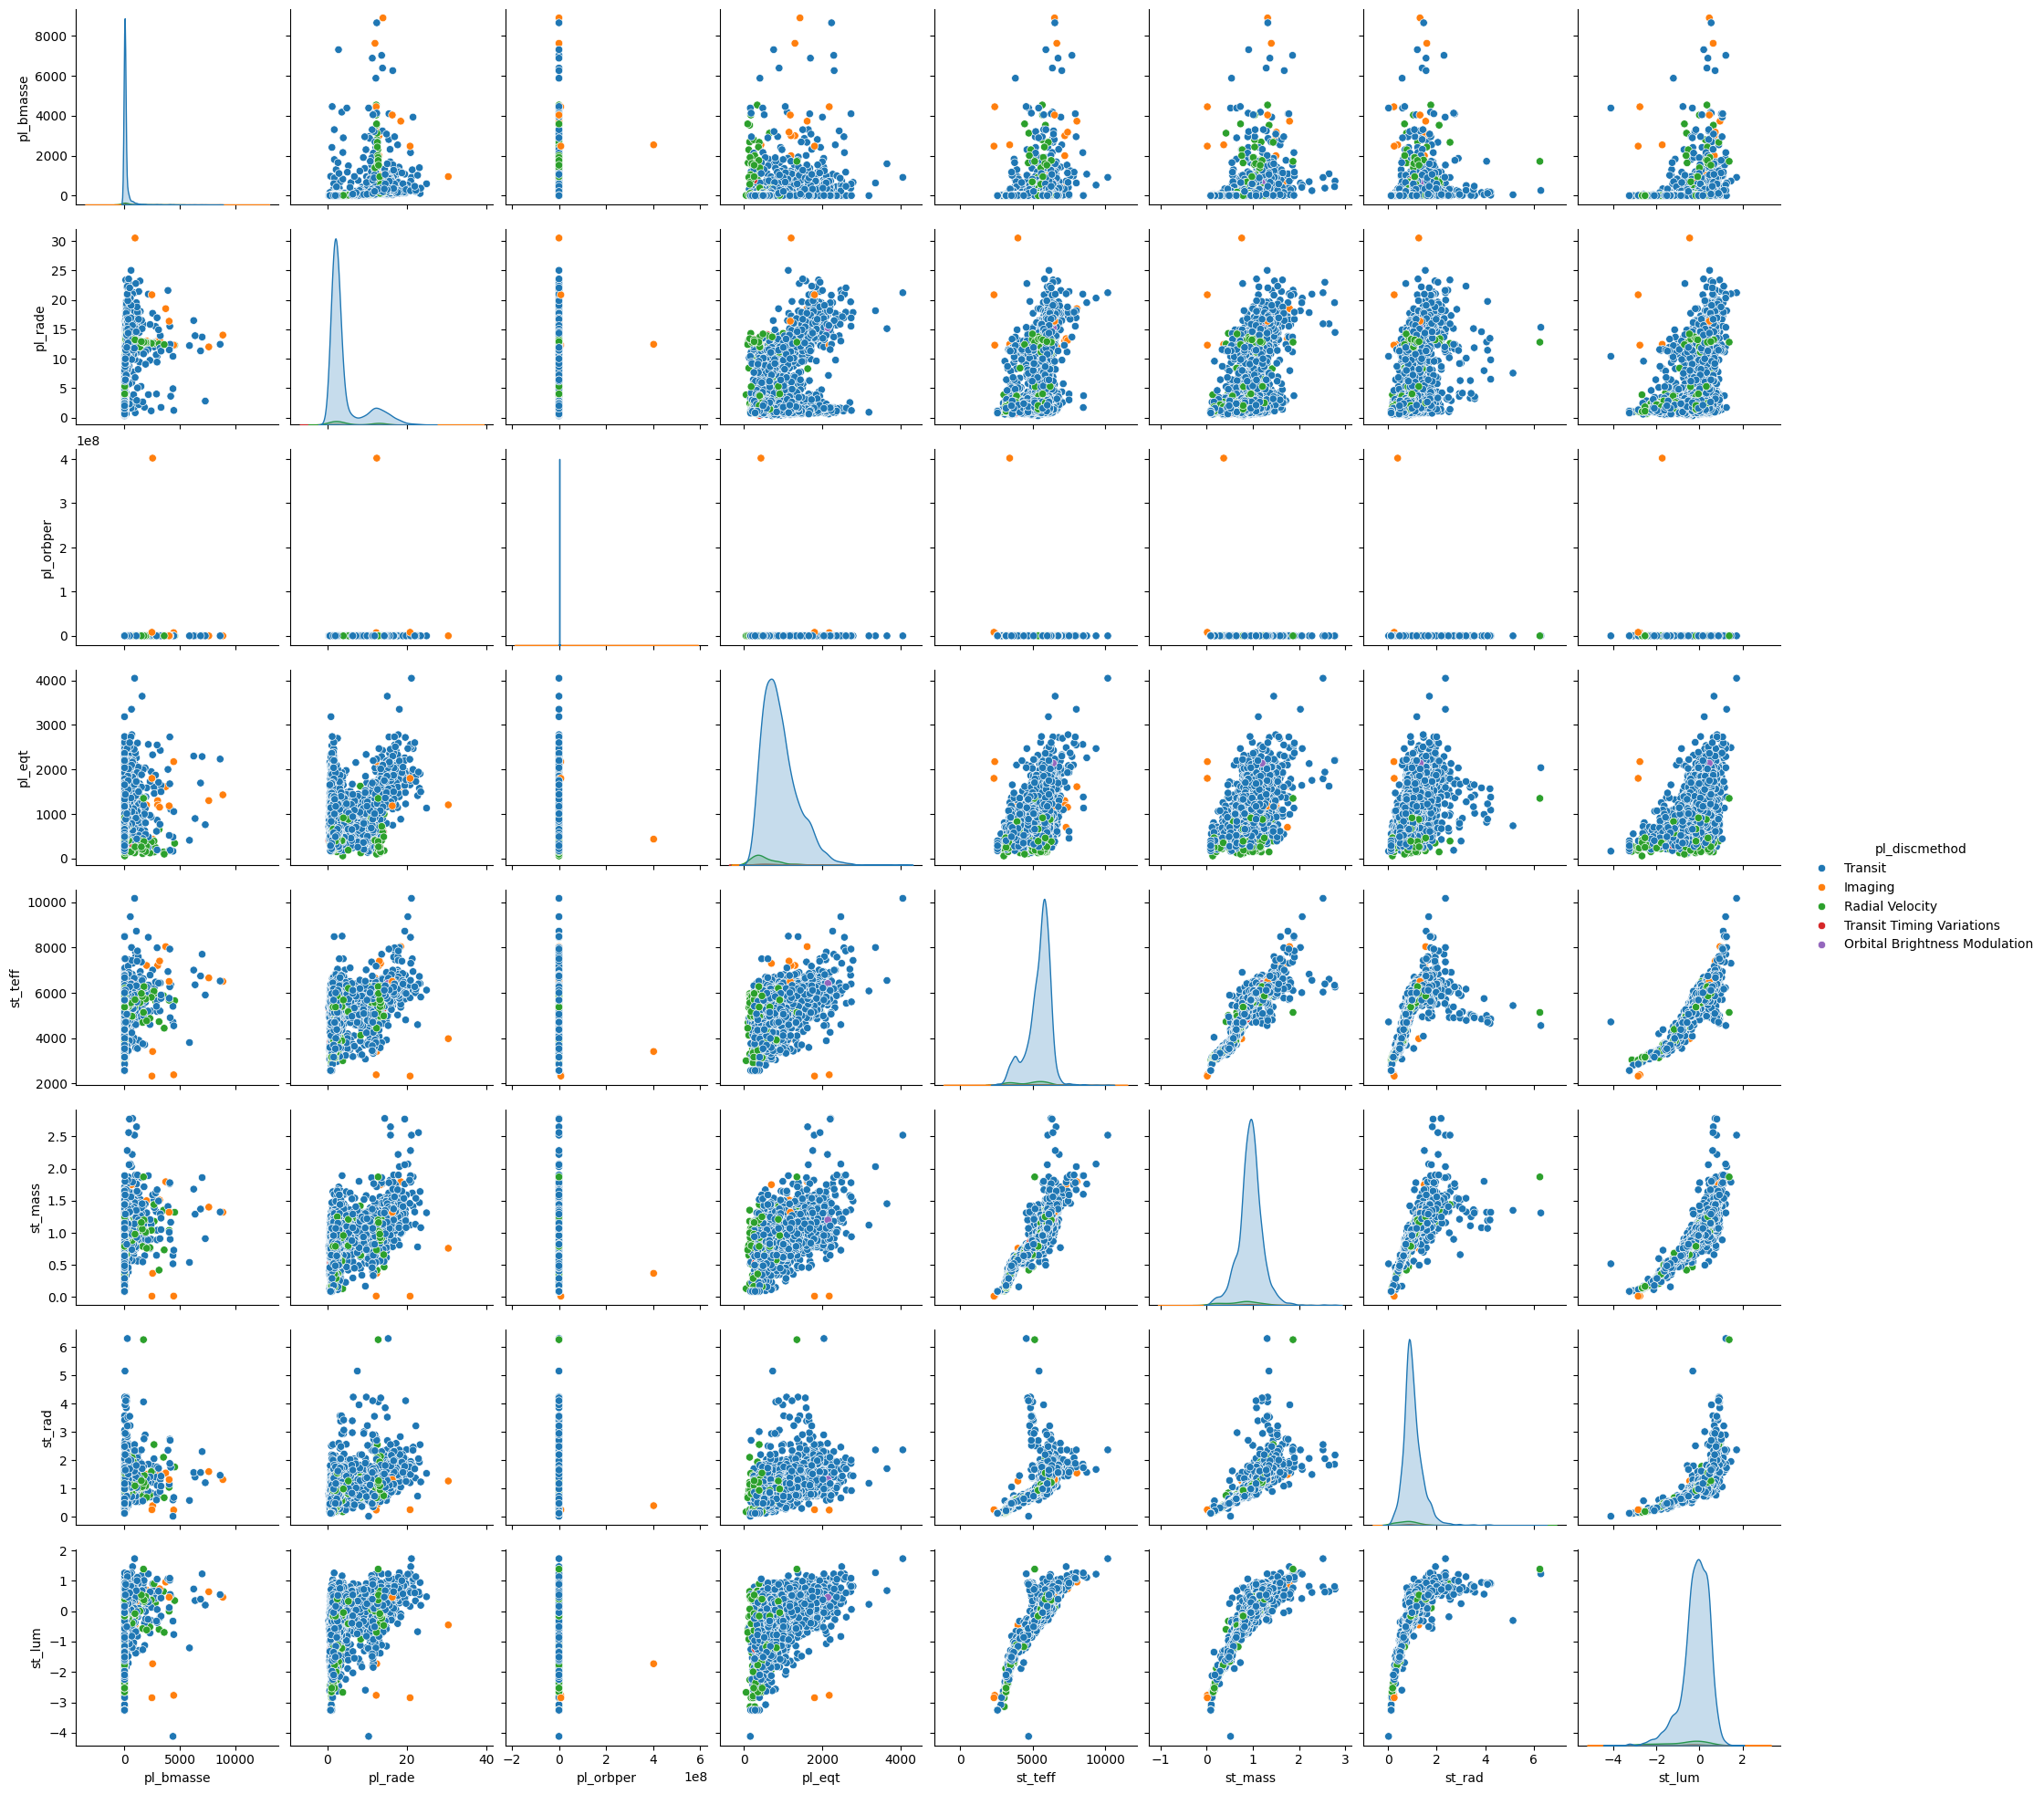

In [14]:
sns.pairplot(df_clean[features + ['pl_discmethod']], hue='pl_discmethod')
plt.show()

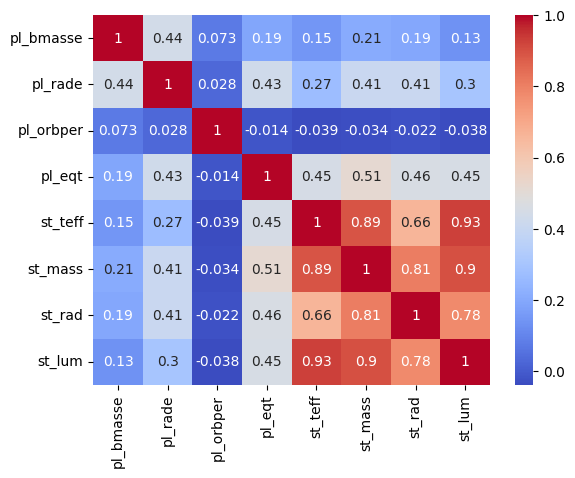

In [15]:
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

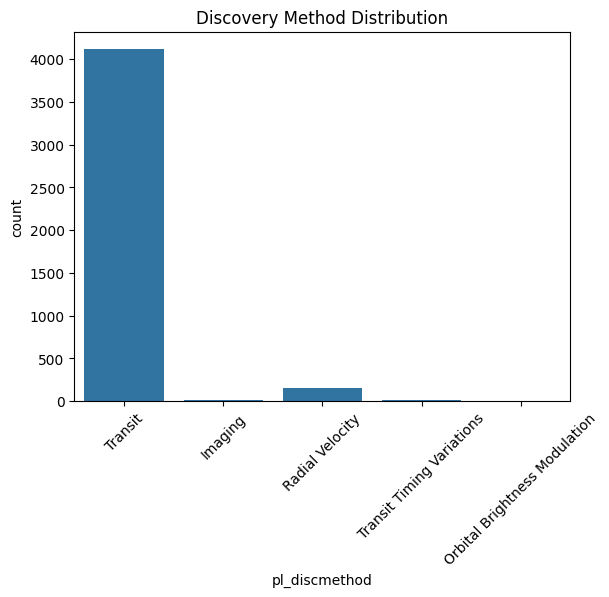

In [16]:
sns.countplot(data=df_clean, x='pl_discmethod')
plt.xticks(rotation=45)
plt.title('Discovery Method Distribution')
plt.show()

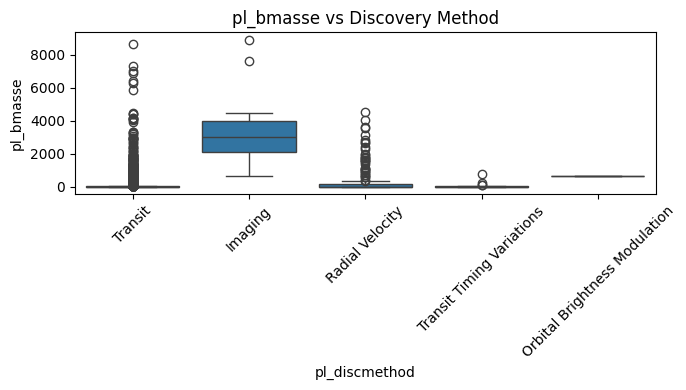

In [17]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='pl_bmasse', data=df_clean)
plt.xticks(rotation=45)
plt.title('pl_bmasse vs Discovery Method')
plt.tight_layout()
plt.show()

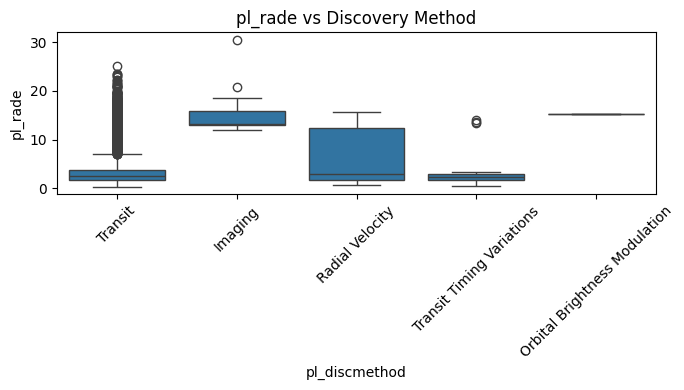

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='pl_rade', data=df_clean)
plt.xticks(rotation=45)
plt.title('pl_rade vs Discovery Method')
plt.tight_layout()
plt.show()

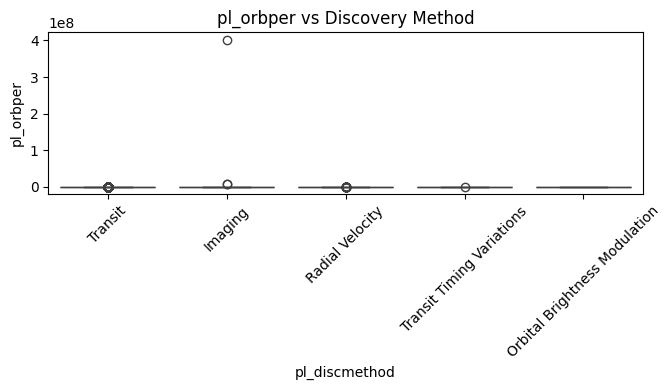

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='pl_orbper', data=df_clean)
plt.xticks(rotation=45)
plt.title('pl_orbper vs Discovery Method')
plt.tight_layout()
plt.show()

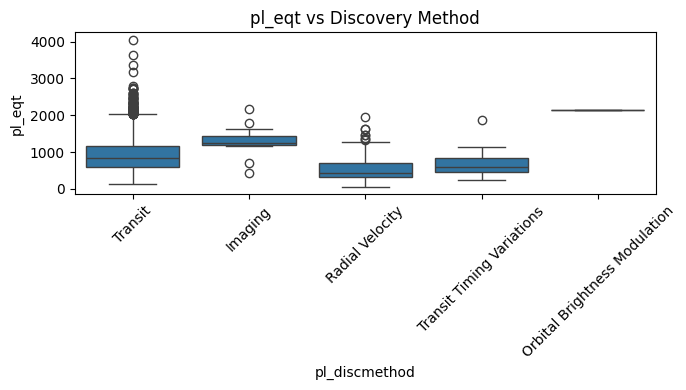

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='pl_eqt', data=df_clean)
plt.xticks(rotation=45)
plt.title('pl_eqt vs Discovery Method')
plt.tight_layout()
plt.show()

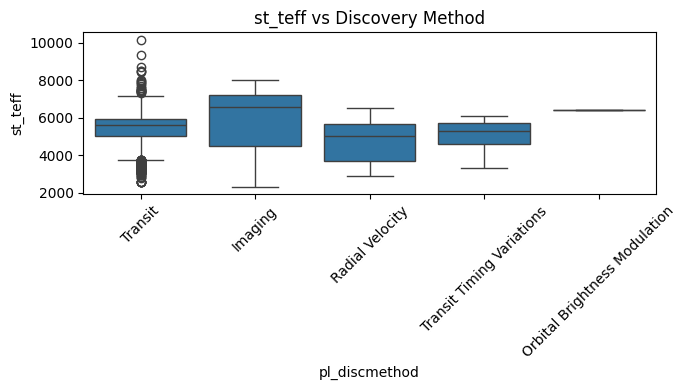

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='st_teff', data=df_clean)
plt.xticks(rotation=45)
plt.title('st_teff vs Discovery Method')
plt.tight_layout()
plt.show()

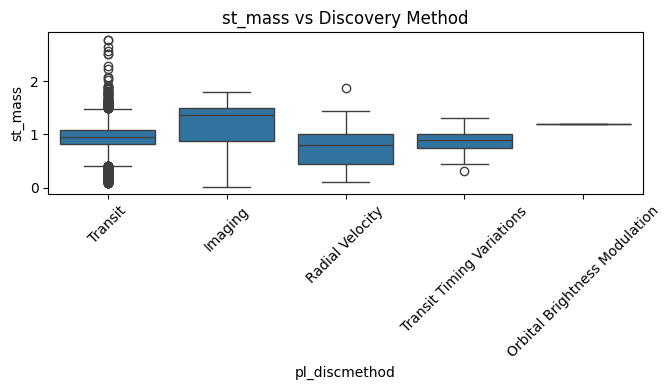

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='st_mass', data=df_clean)
plt.xticks(rotation=45)
plt.title('st_mass vs Discovery Method')
plt.tight_layout()
plt.show()

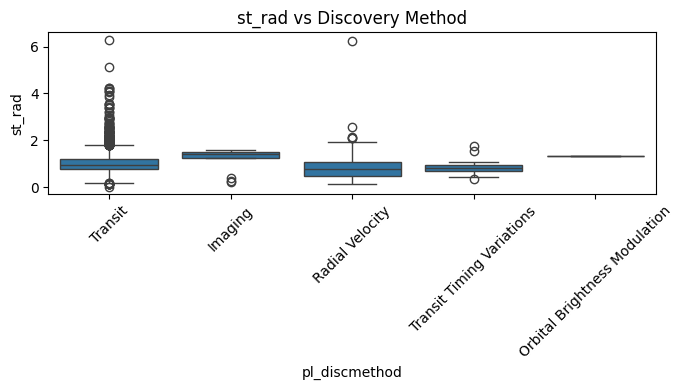

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='st_rad', data=df_clean)
plt.xticks(rotation=45)
plt.title('st_rad vs Discovery Method')
plt.tight_layout()
plt.show()

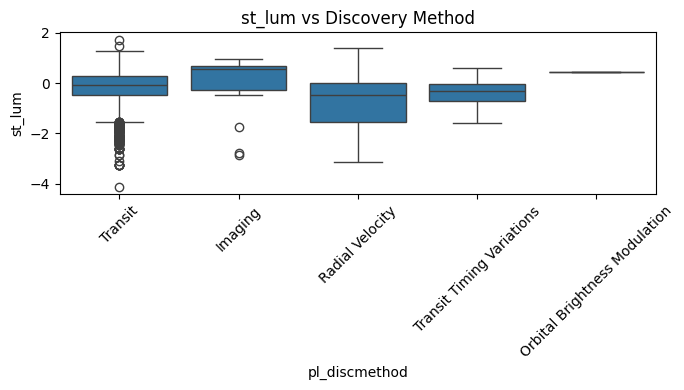

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(x='pl_discmethod', y='st_lum', data=df_clean)
plt.xticks(rotation=45)
plt.title('st_lum vs Discovery Method')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
classes = ['Transit', 'Radial Velocity']
df2 = df[df['pl_discmethod'].isin(classes)].copy()

features = [
    'pl_bmasse', 'pl_rade', 'pl_orbper', 'pl_eqt',
    'st_teff',   'st_mass', 'st_rad',    'st_lum'
]

df2 = df2.dropna(subset=features + ['pl_discmethod'])

df_transit = df2[df2['pl_discmethod'] == 'Transit']
df_rv      = df2[df2['pl_discmethod'] == 'Radial Velocity']

print("Before resampling:", df_transit.shape[0], "Transit vs.", df_rv.shape[0], "RV")

Before resampling: 4117 Transit vs. 159 RV


In [27]:
rv_over = df_rv.sample(n=2000, replace=True, random_state=42)
df_hybrid = pd.concat([df_transit, rv_over]).sample(frac=1, random_state=42).reset_index(drop=True)

print("After resampling: ", df_hybrid['pl_discmethod'].value_counts().to_dict())

After resampling:  {'Transit': 4117, 'Radial Velocity': 2000}


In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [29]:
X = df_hybrid[features].dropna()
y = df_hybrid['pl_discmethod'].map({'Transit': 1, 'Radial Velocity': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(
    penalty='l2',
    C=1e6,
    solver='lbfgs',
    max_iter=500,
    random_state=42
)
logreg.fit(X_scaled, y)

coef_df = pd.DataFrame({
    'feature': features,
    'coef'   : logreg.coef_[0]
})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print(coef_df)

     feature      coef  abs_coef
2  pl_orbper -5.886136  5.886136
7     st_lum  1.163619  1.163619
3     pl_eqt  0.620357  0.620357
1    pl_rade -0.567567  0.567567
6     st_rad -0.416076  0.416076
0  pl_bmasse -0.085021  0.085021
5    st_mass  0.026199  0.026199
4    st_teff -0.008509  0.008509


<ipython-input-30-e36524c46cae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


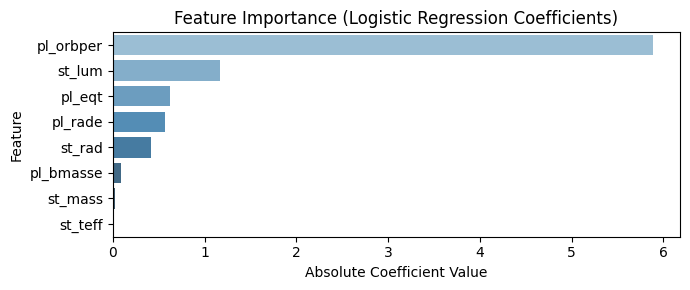

In [30]:
# Sort by absolute coefficient values
coef_df_sorted = coef_df.sort_values('abs_coef', ascending=False)

plt.figure(figsize=(7,3))
sns.barplot(
    x='abs_coef',
    y='feature',
    data=coef_df_sorted,
    palette='Blues_d'
)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
from sklearn.feature_selection import chi2, SelectKBest

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_train_scaled - X_train_scaled.min(), y_train)

chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_selector.scores_,
    'p-value': chi2_selector.pvalues_
}).sort_values('Chi2 Score', ascending=False)

print("\nFeature importance based on Chi-square:")
print(chi2_scores)


Feature importance based on Chi-square:
     Feature  Chi2 Score       p-value
3     pl_eqt  157.097552  4.873417e-36
4    st_teff  121.380783  3.153958e-28
7     st_lum  111.627759  4.311089e-26
5    st_mass   93.284614  4.528993e-22
0  pl_bmasse   48.204758  3.839555e-12
2  pl_orbper   29.448721  5.741591e-08
6     st_rad   28.870965  7.736398e-08
1    pl_rade   21.856909  2.937570e-06


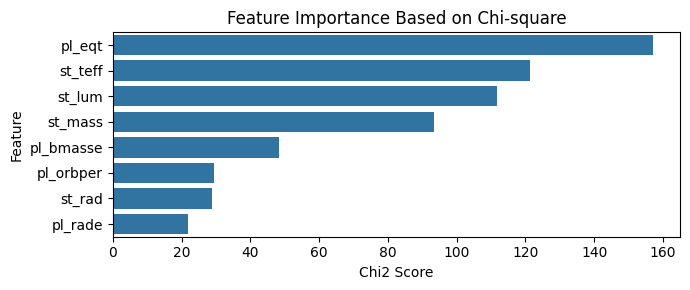

In [33]:
plt.figure(figsize=(7,3))
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_scores)
plt.title('Feature Importance Based on Chi-square')
plt.tight_layout()
plt.show()

In [34]:
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)

In [35]:
print(f"Original model accuracy (all 8 features): {original_accuracy:.4f}")
print("\n=== RF Classification Report ===")
print(classification_report(y_test, y_pred_original))

Original model accuracy (all 8 features): 0.9943

=== RF Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       400
           1       1.00      0.99      1.00       824

    accuracy                           0.99      1224
   macro avg       0.99      1.00      0.99      1224
weighted avg       0.99      0.99      0.99      1224



In [36]:
# 9. KNN (no class_weight available)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_knn)

In [37]:
print(f"Original model accuracy (all 8 features): {original_accuracy:.4f}")
print("\n=== KNN Classification Report ===")
print(classification_report(y_test, y_pred_knn))

Original model accuracy (all 8 features): 0.9387

=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       400
           1       1.00      0.91      0.95       824

    accuracy                           0.94      1224
   macro avg       0.92      0.95      0.93      1224
weighted avg       0.95      0.94      0.94      1224



In [38]:
# 10. SVM with balanced class weights
svm = SVC( random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_svm)

In [39]:
print(f"Original model accuracy (all 8 features): {original_accuracy:.4f}")
print("\n=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))

Original model accuracy (all 8 features): 0.7868

=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       400
           1       0.80      0.91      0.85       824

    accuracy                           0.79      1224
   macro avg       0.77      0.72      0.74      1224
weighted avg       0.78      0.79      0.78      1224



In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

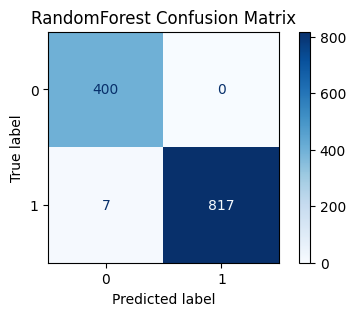

In [41]:
# Confusion Matrix for RandomForest
cm_rf = confusion_matrix(y_test, y_pred_original, labels=rf_original.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_original.classes_)
plt.figure(figsize=(5,3))
disp_rf.plot(cmap='Blues',ax=plt.gca())
plt.title("RandomForest Confusion Matrix")
plt.show()

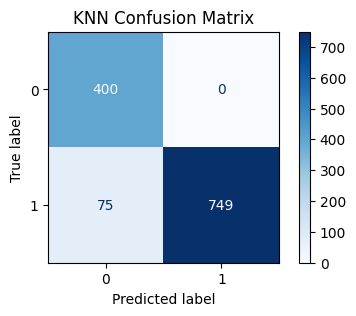

In [42]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
plt.figure(figsize=(5,3))
disp_knn.plot(cmap='Blues',ax=plt.gca())
plt.title("KNN Confusion Matrix")
plt.show()

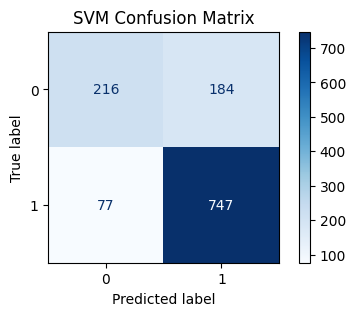

In [43]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
plt.figure(figsize=(5,3))
disp_svm.plot(cmap='Blues',ax=plt.gca())
plt.title("SVM Confusion Matrix")
plt.show()

In [44]:
results_rf = []
conf_matrices = {}

for n_components in range(1,9):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_pca, y_train)

    y_pred = rf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    results_rf.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'explained_variance': sum(pca.explained_variance_ratio_),
        'components': pca.components_
    })

    conf_matrices[n_components] = confusion_matrix(y_test, y_pred)

    print(f"\n--- PCA with {n_components} component(s) ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Explained variance: {sum(pca.explained_variance_ratio_):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


--- PCA with 1 component(s) ---
Accuracy: 0.9812
Explained variance: 0.6763
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       400
           1       1.00      0.97      0.99       824

    accuracy                           0.98      1224
   macro avg       0.97      0.99      0.98      1224
weighted avg       0.98      0.98      0.98      1224


--- PCA with 2 component(s) ---
Accuracy: 0.9902
Explained variance: 0.8893
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       400
           1       1.00      0.99      0.99       824

    accuracy                           0.99      1224
   macro avg       0.99      0.99      0.99      1224
weighted avg       0.99      0.99      0.99      1224


--- PCA with 3 component(s) ---
Accuracy: 0.9926
Explained variance: 0.9672
Classification Report:
              precision    recall  f1-score   

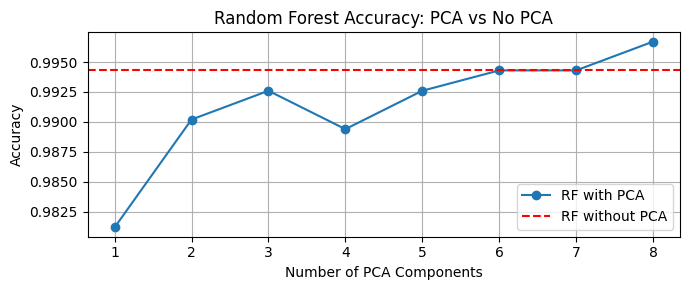

In [45]:
import matplotlib.pyplot as plt

original_accuracy = 0.9943

pca_components = [1, 2, 3, 4, 5, 6, 7, 8]
pca_accuracies = [0.9812, 0.9902, 0.9926, 0.9894, 0.9926, 0.9943, 0.9943, 0.9967]

plt.figure(figsize=(7,3))
plt.plot(pca_components, pca_accuracies, marker='o', label='RF with PCA')
plt.axhline(y=original_accuracy, color='red', linestyle='--', label='RF without PCA')

plt.xticks(pca_components)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy: PCA vs No PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
results_knn = []
conf_matrices = {}

for n_components in range(1,9):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)

    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    results_knn.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'explained_variance': sum(pca.explained_variance_ratio_),
        'components': pca.components_
    })

    conf_matrices[n_components] = confusion_matrix(y_test, y_pred)

    print(f"\n--- PCA with {n_components} component(s) ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Explained variance: {sum(pca.explained_variance_ratio_):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


--- PCA with 1 component(s) ---
Accuracy: 0.9338
Explained variance: 0.6763
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       400
           1       1.00      0.90      0.95       824

    accuracy                           0.93      1224
   macro avg       0.92      0.95      0.93      1224
weighted avg       0.94      0.93      0.94      1224


--- PCA with 2 component(s) ---
Accuracy: 0.9224
Explained variance: 0.8893
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       400
           1       1.00      0.88      0.94       824

    accuracy                           0.92      1224
   macro avg       0.90      0.94      0.92      1224
weighted avg       0.94      0.92      0.92      1224


--- PCA with 3 component(s) ---
Accuracy: 0.9306
Explained variance: 0.9672
Classification Report:
              precision    recall  f1-score   

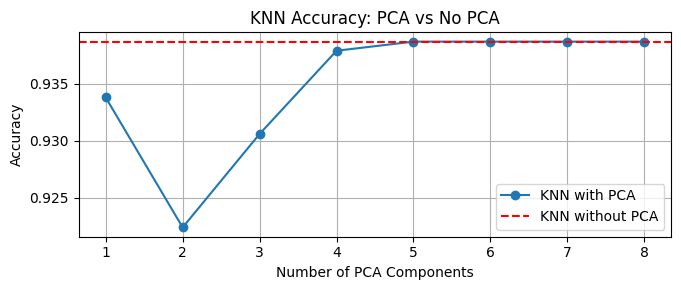

In [47]:
original_accuracy = 0.9387

pca_components = [1, 2, 3, 4, 5, 6, 7, 8]
pca_accuracies = [0.9338, 0.9224, 0.9306, 0.9379, 0.9387, 0.9387, 0.9387, 0.9387]

plt.figure(figsize=(7,3))
plt.plot(pca_components, pca_accuracies, marker='o', label='KNN with PCA')
plt.axhline(y=original_accuracy, color='red', linestyle='--', label='KNN without PCA')

plt.xticks(pca_components)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy: PCA vs No PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
results_svm = []
conf_matrices = {}

for n_components in range(1, 9):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm = SVC( random_state=42)
    svm.fit(X_train_pca, y_train)

    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    results_svm.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'explained_variance': sum(pca.explained_variance_ratio_),
        'components': pca.components_
    })

    conf_matrices[n_components] = confusion_matrix(y_test, y_pred)

    print(f"\n--- PCA with {n_components} component(s) ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Explained variance: {sum(pca.explained_variance_ratio_):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


--- PCA with 1 component(s) ---
Accuracy: 0.7377
Explained variance: 0.6763
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.21      0.34       400
           1       0.72      1.00      0.84       824

    accuracy                           0.74      1224
   macro avg       0.84      0.60      0.59      1224
weighted avg       0.80      0.74      0.67      1224


--- PCA with 2 component(s) ---
Accuracy: 0.7892
Explained variance: 0.8893
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.51      0.61       400
           1       0.80      0.92      0.86       824

    accuracy                           0.79      1224
   macro avg       0.78      0.72      0.73      1224
weighted avg       0.79      0.79      0.78      1224


--- PCA with 3 component(s) ---
Accuracy: 0.7958
Explained variance: 0.9672
Classification Report:
              precision    recall  f1-score   

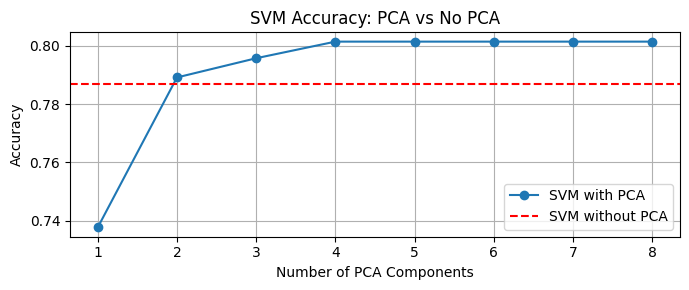

In [49]:
original_accuracy = 0.7868

pca_components = [1, 2, 3, 4, 5, 6, 7, 8]
pca_accuracies = [0.7377, 0.7892, 0.7958, 0.8015, 0.8015, 0.8015, 0.8015, 0.8015]

plt.figure(figsize=(7,3))
plt.plot(pca_components, pca_accuracies, marker='o', label='SVM with PCA')
plt.axhline(y=original_accuracy, color='red', linestyle='--', label='SVM without PCA')

plt.xticks(pca_components)
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy: PCA vs No PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

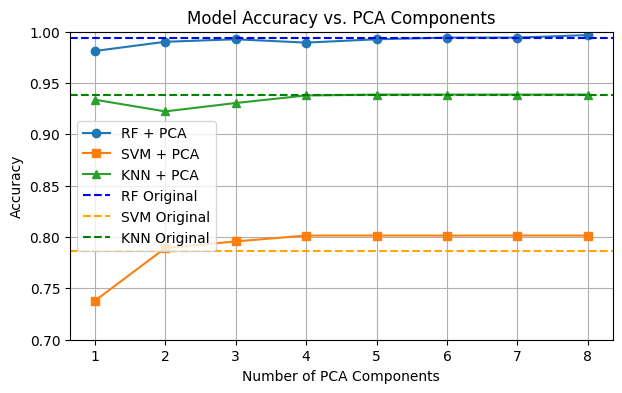

In [50]:
components = np.arange(1, 9)
rf_acc = [r['accuracy'] for r in results_rf]
svm_acc = [r['accuracy'] for r in results_svm]
knn_acc = [r['accuracy'] for r in results_knn]

rf_original = 0.9943
svm_original = 0.7868
knn_original = 0.9387

plt.figure(figsize=(7,4))

plt.plot(components, rf_acc, marker='o', label='RF + PCA')
plt.plot(components, svm_acc, marker='s', label='SVM + PCA')
plt.plot(components, knn_acc, marker='^', label='KNN + PCA')

plt.axhline(y=rf_original, color='blue', linestyle='--', label='RF Original')
plt.axhline(y=svm_original, color='orange', linestyle='--', label='SVM Original')
plt.axhline(y=knn_original, color='green', linestyle='--', label='KNN Original')

plt.title('Model Accuracy vs. PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0.7, 1)
plt.show()